# pandas 105

データ処理・基本統計処理をpandasで実践します。

## 欠損値処理

データ分析を行う中で欠損値(データとしてはNaNで表現される)が入っていると予期せぬ結果や誤った結果が導き出されてしまう。  
このような事態を事前に防ぐために、欠損値を処理する方法を学ぶ。

In [1]:
# 処理対象のデータを読み込む

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2f096557af5b49e48e4fe6586d2aa704 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='API_KEY_ID',
    ibm_auth_endpoint="AUTH_ENDPOINT",
    config=Config(signature_version='oauth'),
    endpoint_url='ENDPOINT_URL')

body = client_2f096557af5b49e48e4fe6586d2aa704.get_object(Bucket='BUCKET_NAME',Key='201705health.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_201705 = pd.read_csv(body)
df_201705.head()

,日付,歩数,摂取カロリー
0,2017-05-01,1439.0,4500.0
1,2017-05-02,8120.0,2420.0
2,2017-05-03,NaN,NaN
3,2017-05-04,2329.0,1500.0
4,2017-05-05,NaN,NaN


In [2]:
# 欠損値を除去する
df_201705_drop = df_201705.dropna()
df_201705_drop

,日付,歩数,摂取カロリー
0,2017-05-01,1439.0,4500.0
1,2017-05-02,8120.0,2420.0
3,2017-05-04,2329.0,1500.0
5,2017-05-06,3233.0,1800.0
6,2017-05-07,9593.0,2200.0
7,2017-05-08,9213.0,1800.0
8,2017-05-09,5593.0,2500.0


In [3]:
# 欠損値を固定値で埋めることもできる
df_201705_fill0 = df_201705.fillna(0)
df_201705_fill0

,日付,歩数,摂取カロリー
0,2017-05-01,1439.0,4500.0
1,2017-05-02,8120.0,2420.0
2,2017-05-03,0.0,0.0
3,2017-05-04,2329.0,1500.0
4,2017-05-05,0.0,0.0
5,2017-05-06,3233.0,1800.0
6,2017-05-07,9593.0,2200.0
7,2017-05-08,9213.0,1800.0
8,2017-05-09,5593.0,2500.0


In [4]:
# 1つ手前の値で補完もいいね
df_201705_ffill = df_201705.fillna(method="ffill")
df_201705_ffill

,日付,歩数,摂取カロリー
0,2017-05-01,1439.0,4500.0
1,2017-05-02,8120.0,2420.0
2,2017-05-03,8120.0,2420.0
3,2017-05-04,2329.0,1500.0
4,2017-05-05,2329.0,1500.0
5,2017-05-06,3233.0,1800.0
6,2017-05-07,9593.0,2200.0
7,2017-05-08,9213.0,1800.0
8,2017-05-09,5593.0,2500.0


In [5]:
# 他にも平均値、中央値、最頻値で補完するやり方もあるが、基本はfillna(補完値)という形式
df_201705_fillmedian = df_201705.fillna(df_201705.median())
df_201705_fillmedian

,日付,歩数,摂取カロリー
0,2017-05-01,1439.0,4500.0
1,2017-05-02,8120.0,2420.0
2,2017-05-03,5593.0,2200.0
3,2017-05-04,2329.0,1500.0
4,2017-05-05,5593.0,2200.0
5,2017-05-06,3233.0,1800.0
6,2017-05-07,9593.0,2200.0
7,2017-05-08,9213.0,1800.0
8,2017-05-09,5593.0,2500.0


## データ連結

DataFrame同士を連結・加工してみる。

In [8]:
# 連結元データはいるか?
!ls -l *.pickle

-rw-r----- 1 dsxuser dsxuser 1290 Jul 20 16:06 201704_health_calc_moved.pickle
-rw-r----- 1 dsxuser dsxuser 2280 Jul 20 16:06 201704_health_calc.pickle


In [10]:
df_201704_health = pd.read_pickle("201704_health_calc.pickle")
df_201704_health

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,12045,1950.0,6.176923,High


In [11]:
df_201704_moved = pd.read_pickle("201704_health_calc_moved.pickle")
df_201704_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [12]:
# 2つのDataFrameを同一Indexで列方向に連結する
df_merged = pd.concat([df_201704_health, df_201704_moved], axis=1)
df_merged

,歩数,摂取カロリー,歩数/カロリー,運動指数,運動_High,運動_Low,運動_Mid
date,,,,,,,
2017-04-01,5439,2500.0,2.175600,Low,0,1,0
2017-04-02,2510,2300.0,1.091304,Low,0,1,0
2017-04-03,10238,1950.0,5.250256,Mid,0,0,1
2017-04-04,8209,1850.0,4.437297,Mid,0,0,1
2017-04-05,9434,1930.0,4.888083,Mid,0,0,1
2017-04-06,7593,1800.0,4.218333,Mid,0,0,1
2017-04-07,9320,1940.0,4.804124,Mid,0,0,1
2017-04-08,4873,2300.0,2.118696,Low,0,1,0
2017-04-09,12045,1950.0,6.176923,High,1,0,0


In [14]:
# 5月分のデータを読み込む
body = client_2f096557af5b49e48e4fe6586d2aa704.get_object(Bucket='BUCKET_NAME',Key='201705health.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_201705_health = pd.read_csv(body, index_col="日付", parse_dates=True)
df_201705_health_fill = df_201705_health.fillna(method="ffill")
df_201705_health_fill.head()

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-05,2329.0,1500.0


In [15]:
# 4月のDataFrameと5月のDataFrameを行方向に連結
df_merged_0405 = pd.concat([df_merged, df_201705_health_fill], axis=0, sort=True)
df_merged_0405

,摂取カロリー,歩数,歩数/カロリー,運動_High,運動_Low,運動_Mid,運動指数
2017-04-01,2500.0,5439.0,2.175600,0.0,1.0,0.0,Low
2017-04-02,2300.0,2510.0,1.091304,0.0,1.0,0.0,Low
2017-04-03,1950.0,10238.0,5.250256,0.0,0.0,1.0,Mid
2017-04-04,1850.0,8209.0,4.437297,0.0,0.0,1.0,Mid
2017-04-05,1930.0,9434.0,4.888083,0.0,0.0,1.0,Mid
2017-04-06,1800.0,7593.0,4.218333,0.0,0.0,1.0,Mid
2017-04-07,1940.0,9320.0,4.804124,0.0,0.0,1.0,Mid
2017-04-08,2300.0,4873.0,2.118696,0.0,1.0,0.0,Low
2017-04-09,1950.0,12045.0,6.176923,1.0,0.0,0.0,High
2017-04-10,1850.0,7493.0,4.050270,0.0,0.0,1.0,Mid


## 基本統計量

最大値、最小値、標準偏差といった基本統計量を扱います。

In [16]:
# 最大値
df_201704_health.loc[:, "摂取カロリー"].max()

2500.0

In [17]:
# 最小値
df_201704_health.loc[:, "摂取カロリー"].min()

1800.0

In [18]:
# 最頻値
df_201704_health.loc[:, "摂取カロリー"].mode()

0    2300.0
dtype: float32

In [19]:
# 算術平均
ser_calorie = df_201704_health.loc[:, "摂取カロリー"]
ser_calorie.mean()

2026.6666259765625

In [20]:
# 中央値
ser_calorie.median()

1945.0

In [21]:
# 不変分散による標準偏差
ser_calorie.std()

205.5494384765625

In [22]:
# 母集団の標準偏差
ser_calorie.std(ddof=0)

202.09457397460938

In [23]:
# 件数
ser_calorie.count()

30

In [24]:
# 基本統計量の要約
df_201704_health.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658
std,2689.269308,205.549438,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


In [25]:
# 相関係数もpandasにかかれば1行で出力できる
df_201704_health.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


In [26]:
# matplotlibをマジックコマンドで叩いて散布図を出力
%matplotlib inline

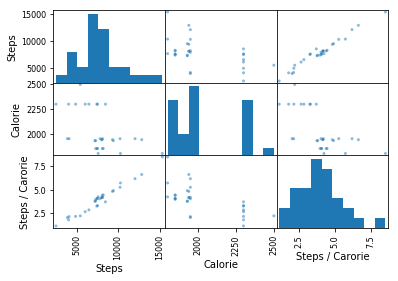

In [29]:
# 散布図行列を出力する関数をインポートして、散布図行列を図示
from pandas.plotting import scatter_matrix
df_201704_health.columns = ["Steps", "Calorie", "Steps / Carorie", "Activity Status"]
_ = scatter_matrix(df_201704_health)

## pandas DataFrame から numpy ndarrayへの変換

機械学習のフレームワークによっては、値をpandas DataFrameではなくnumpyのndarrayしか受け取れないものがある。  
DataFrameからndarrayへの変換方法とは...

In [32]:
df_201704_health.loc[:, ["Steps", "Calorie"]].head()

,Steps,Calorie
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0


In [33]:
# DataFrameのvaluesを使えば一発...!?
df_201704_health.loc[:, ["Steps", "Calorie"]].values

array([[ 5439.,  2500.],
       [ 2510.,  2300.],
       [10238.,  1950.],
       [ 8209.,  1850.],
       [ 9434.,  1930.],
       [ 7593.,  1800.],
       [ 9320.,  1940.],
       [ 4873.,  2300.],
       [12045.,  1950.],
       [ 7493.,  1850.],
       [ 7289.,  1930.],
       [ 6481.,  2300.],
       [10287.,  1800.],
       [ 8043.,  1940.],
       [ 7435.,  2300.],
       [ 7529.,  2300.],
       [ 8031.,  1940.],
       [ 8475.,  2300.],
       [ 8132.,  1950.],
       [15328.,  1800.],
       [12849.,  1940.],
       [ 4029.,  2300.],
       [ 3890.,  1950.],
       [ 8093.,  1850.],
       [ 7823.,  1950.],
       [ 7492.,  1850.],
       [ 7203.,  1930.],
       [ 7302.,  1850.],
       [ 6033.,  2300.],
       [ 4093.,  1950.]])